In [1]:
import numpy as np
from PIL import Image, ImageDraw

Convert images to matrixes

In [2]:
img1 = Image.open('img1.png').convert('RGB')
img2 = Image.open('img2.png').convert('RGB')

arr1 = np.array(img1)
arr2 = np.array(img2)

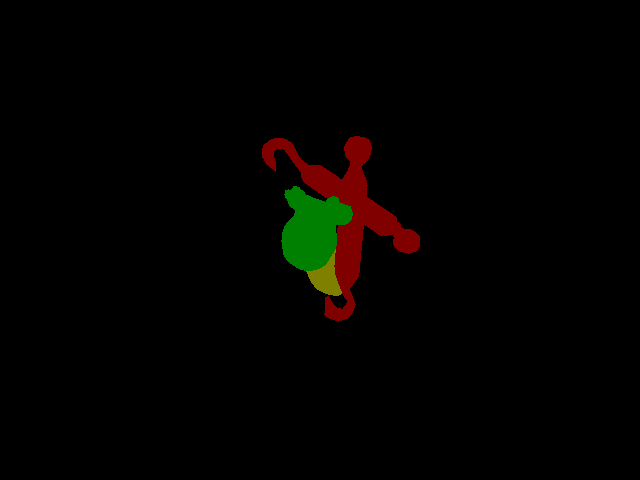

In [3]:
img1

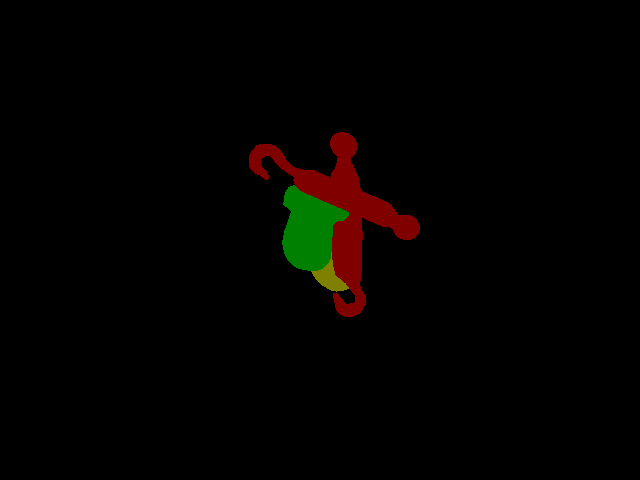

In [4]:
img2

Get IoU for these two images

In [5]:
intersection = np.logical_and(arr1, arr2)
union = np.logical_or(arr1, arr2)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU = ", iou_score)

IoU =  0.5880202655037516


Get IoU for each color

In [6]:
#create set of colors
img1_colors = set()
img2_colors = set()

for color in img1.getcolors():
    img1_colors.add(color[1]) 
for color in img1.getcolors():
    img2_colors.add(color[1])

colors = img1_colors.union(img2_colors)
colors

{(0, 0, 0), (0, 128, 0), (128, 0, 0), (128, 128, 0)}

In [7]:
width = 640
height = 480

iou_scores = list()
mask1 = np.zeros(shape=(height,width))
mask2 = np.zeros(shape=(height,width))

for color in colors:
    for i in range(0, height):
        for j in range(0, width):
            if list(arr1[i][j]) == list(color):
                mask1[i][j] = True
            else:
                mask1[i][j] = False
            if list(arr2[i][j]) == list(color):
                mask2[i][j] = True
            else:
                mask2[i][j] = False
    #count iou
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou_score = np.sum(intersection) / np.sum(union)
    print("IoU score for " + '(' + ''.join(str(e) + ' ' for e in list(color)) + ')' + " is " + '%.2f' % iou_score)
    iou_scores.append(iou_score)

IoU score for (128 0 0 ) is 0.46
IoU score for (128 128 0 ) is 0.55
IoU score for (0 128 0 ) is 0.85
IoU score for (0 0 0 ) is 0.98
